# 実践コンピュータビジョン
# 1章 基本的な画像処理
## 1.4 SciPy
テキストp.17
ここではSciPyパッケージのndimageを使い、いくつかの画像処理を行う。

### 1.4.1 画像をぼかす

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
# scipy.ndimageのimport
from scipy.ndimage import filters

In [3]:
# オリジナルの画像
im = np.array(Image.open('data/empire.jpg').convert('L'))
# ガウシアンフィルタをかける
im2 = filters.gaussian_filter(im, 5)

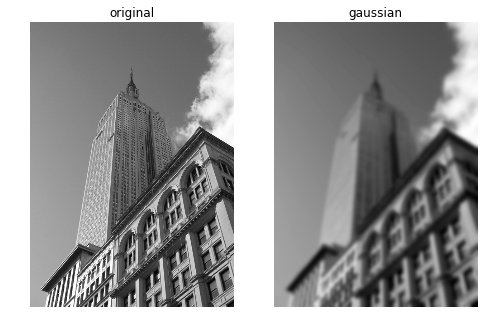

In [4]:
plt.figure(figsize=(8,8))
plt.gray()
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis('off')
plt.title('gaussian')
plt.show()

In [5]:
# RGBカラー画像にガウシアンフィルタをかける
im = np.array(Image.open('data/empire.jpg'))
im2 = np.zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],10)
im2 = np.uint8(im2)

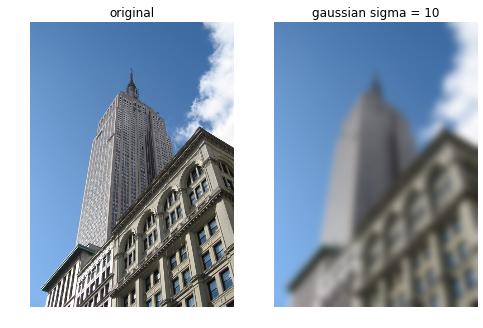

In [6]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis('off')
plt.title('gaussian sigma = 10')
plt.show()

### 1.4.2 画像の微分
画像の明度の変化を計算して、フィルタをかける

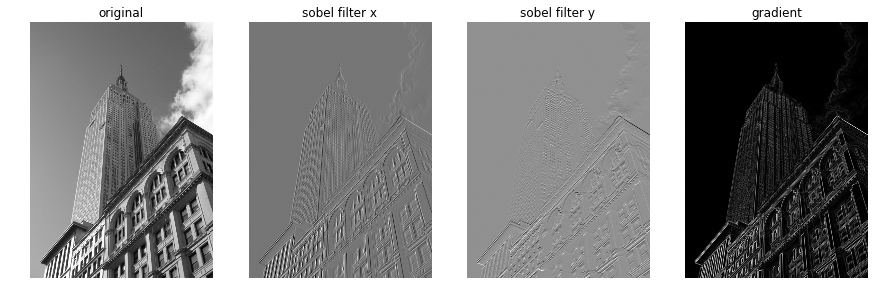

In [7]:
im = np.array(Image.open('data/empire.jpg').convert('L'))

# Sobel微分係数フィルタ
imx = np.zeros(im.shape)
filters.sobel(im, 1, imx)

imy = np.zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = np.sqrt(imx**2 + imy**2)

imlist = [im, imx, imy, magnitude]
tlist = ['original', 'sobel filter x', 'sobel filter y', 'gradient']
plt.figure(figsize=(15,10))
plt.gray()
for i, im, title in zip(range(4),imlist, tlist):
    plt.subplot(1,4,i+1)
    plt.imshow(im)
    plt.axis('off')
    plt.title(title)

sigma = 0


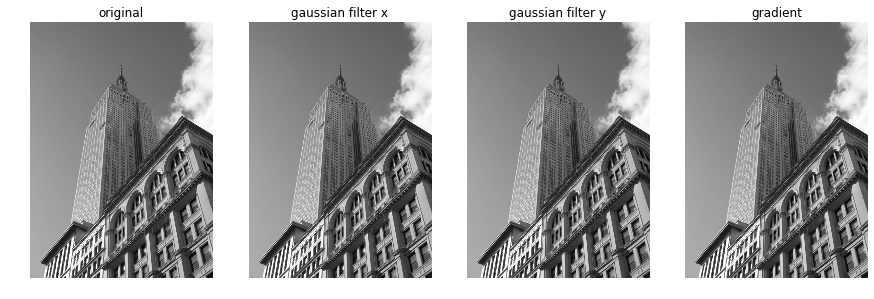

sigma = 2


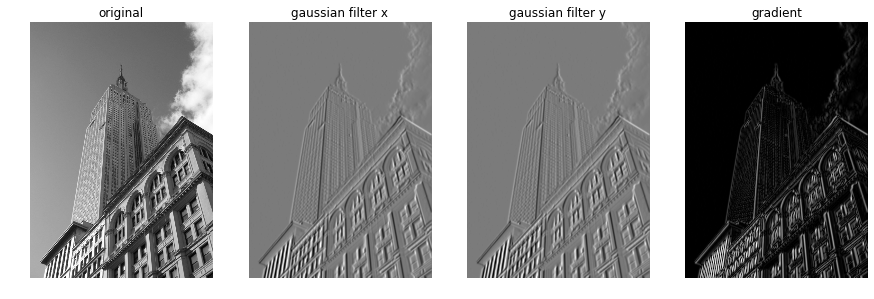

sigma = 5


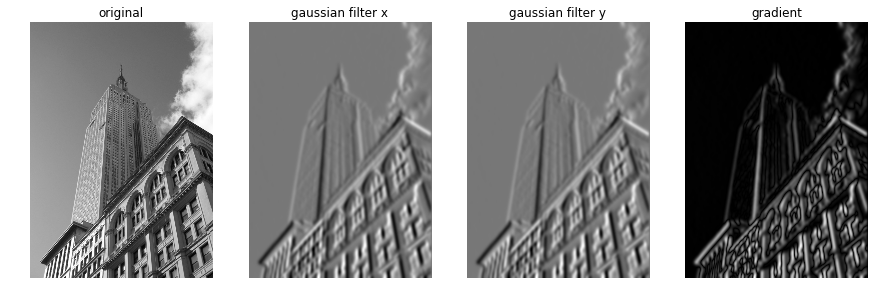

sigma = 10


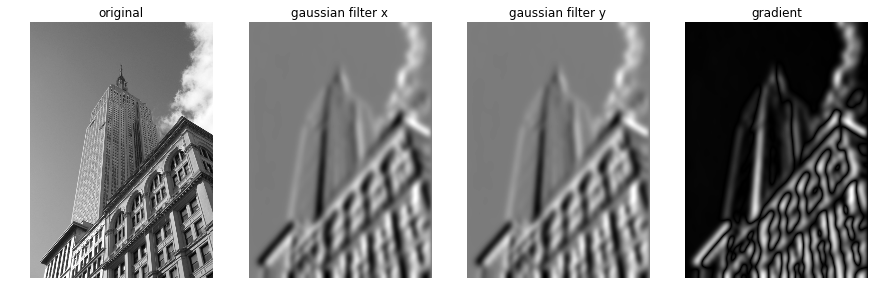

In [8]:
# テキストp.21図1-11。ただし、縦横の配置が逆で、sigma=0の行が含まれる
slist = [0, 2, 5, 10]

for sigma in slist:
    im = np.array(Image.open('data/empire.jpg').convert('L'))
    print('sigma =', sigma)
    # X方向のガウシアンフィルタ
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)

    # X方向のガウシアンフィルタ
    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imy)

    magnitude = np.sqrt(imx**2 + imy**2)

    imlist = [im, imx, imy, magnitude]
    tlist = ['original', 'gaussian filter x', 'gaussian filter y', 'gradient']
    plt.figure(figsize=(15,10))
    plt.gray()
    for i, im, title in zip(range(4),imlist, tlist):
        plt.subplot(1,4,i+1)
        plt.imshow(im)
        plt.axis('off')
        plt.title(title)
    plt.show()

### 1.4.3 モルフォロジー - 物体を数える
テキストp.22

In [9]:
from scipy.ndimage import measurements,morphology

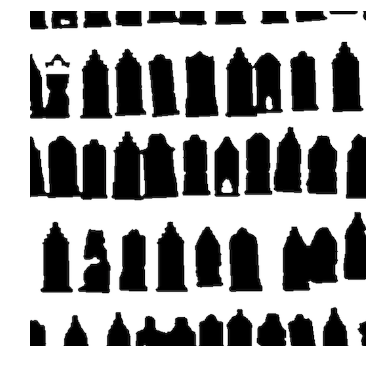

In [10]:
# オリジナルの画像を表示する
im = np.array(Image.open('data/houses.png'))
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(im)

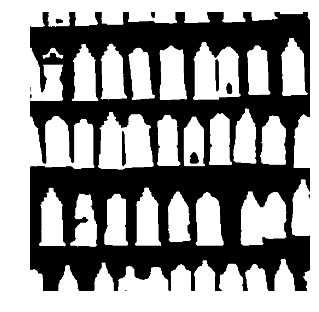

In [11]:
# 画像を読み込み、閾値処理で2値化する
im = np.array(Image.open('data/houses.png').convert('L'))
im = (im<128)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(im)

scipy.ndimage.measurementsの関数label()を用いて、  画像内の物体（白い領域）を数えることができる。  
戻り値は  
- labels: ラベル付けされた画像  
- nbr_objects: カウントされた物体の数

In [12]:
labels, nbr_objects = measurements.label(im)
print("Number of objects:", nbr_objects)

Number of objects: 45


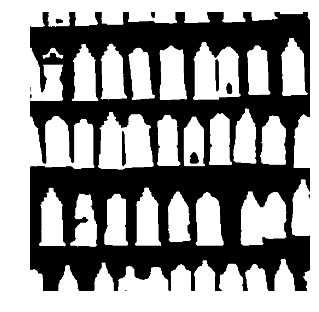

In [13]:
# モルフォロジー　物体を分離する
im_open = morphology.binary_opening(im,np.ones((9,5)),iterations=2) 
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(im)
plt.show()

In [14]:
labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)

Number of objects: 48


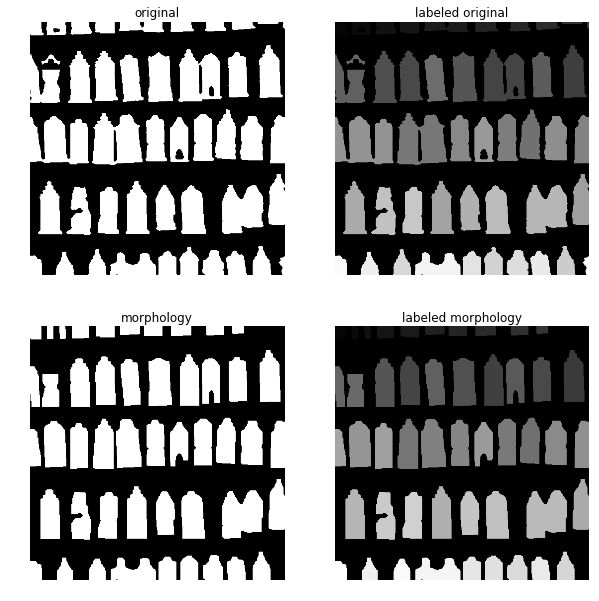

In [15]:
imlist = [im, labels, im_open, labels_open]
tlist = ['original', 'labeled original', 'morphology', 'labeled morphology']
plt.figure(figsize=(10,10))
plt.gray()
for i, im, title in zip(range(4),imlist, tlist):
    plt.subplot(2,2,i+1)
    plt.imshow(im)
    plt.axis('off')
    plt.title(title)

### 1.4.4 便利なSciPyモジュール
入出力のモジュールioとmiscの説明。ここでは省略。